<a href="https://colab.research.google.com/github/IritaSee/taekwondo-pose-estimation/blob/master/taewkondo_pose_estimation_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the path to your video file in Google Drive
video_path = '/content/drive/MyDrive/dataset video/tangkisan/anmaki/ica-anmaki (2).mp4'

Setting Up MediaPipe

In [ ]:
!pip install mediapipe opencv-python

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Initialize drawing utils for visualization
mp_drawing = mp.solutions.drawing_utils


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


Estimating Pose

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


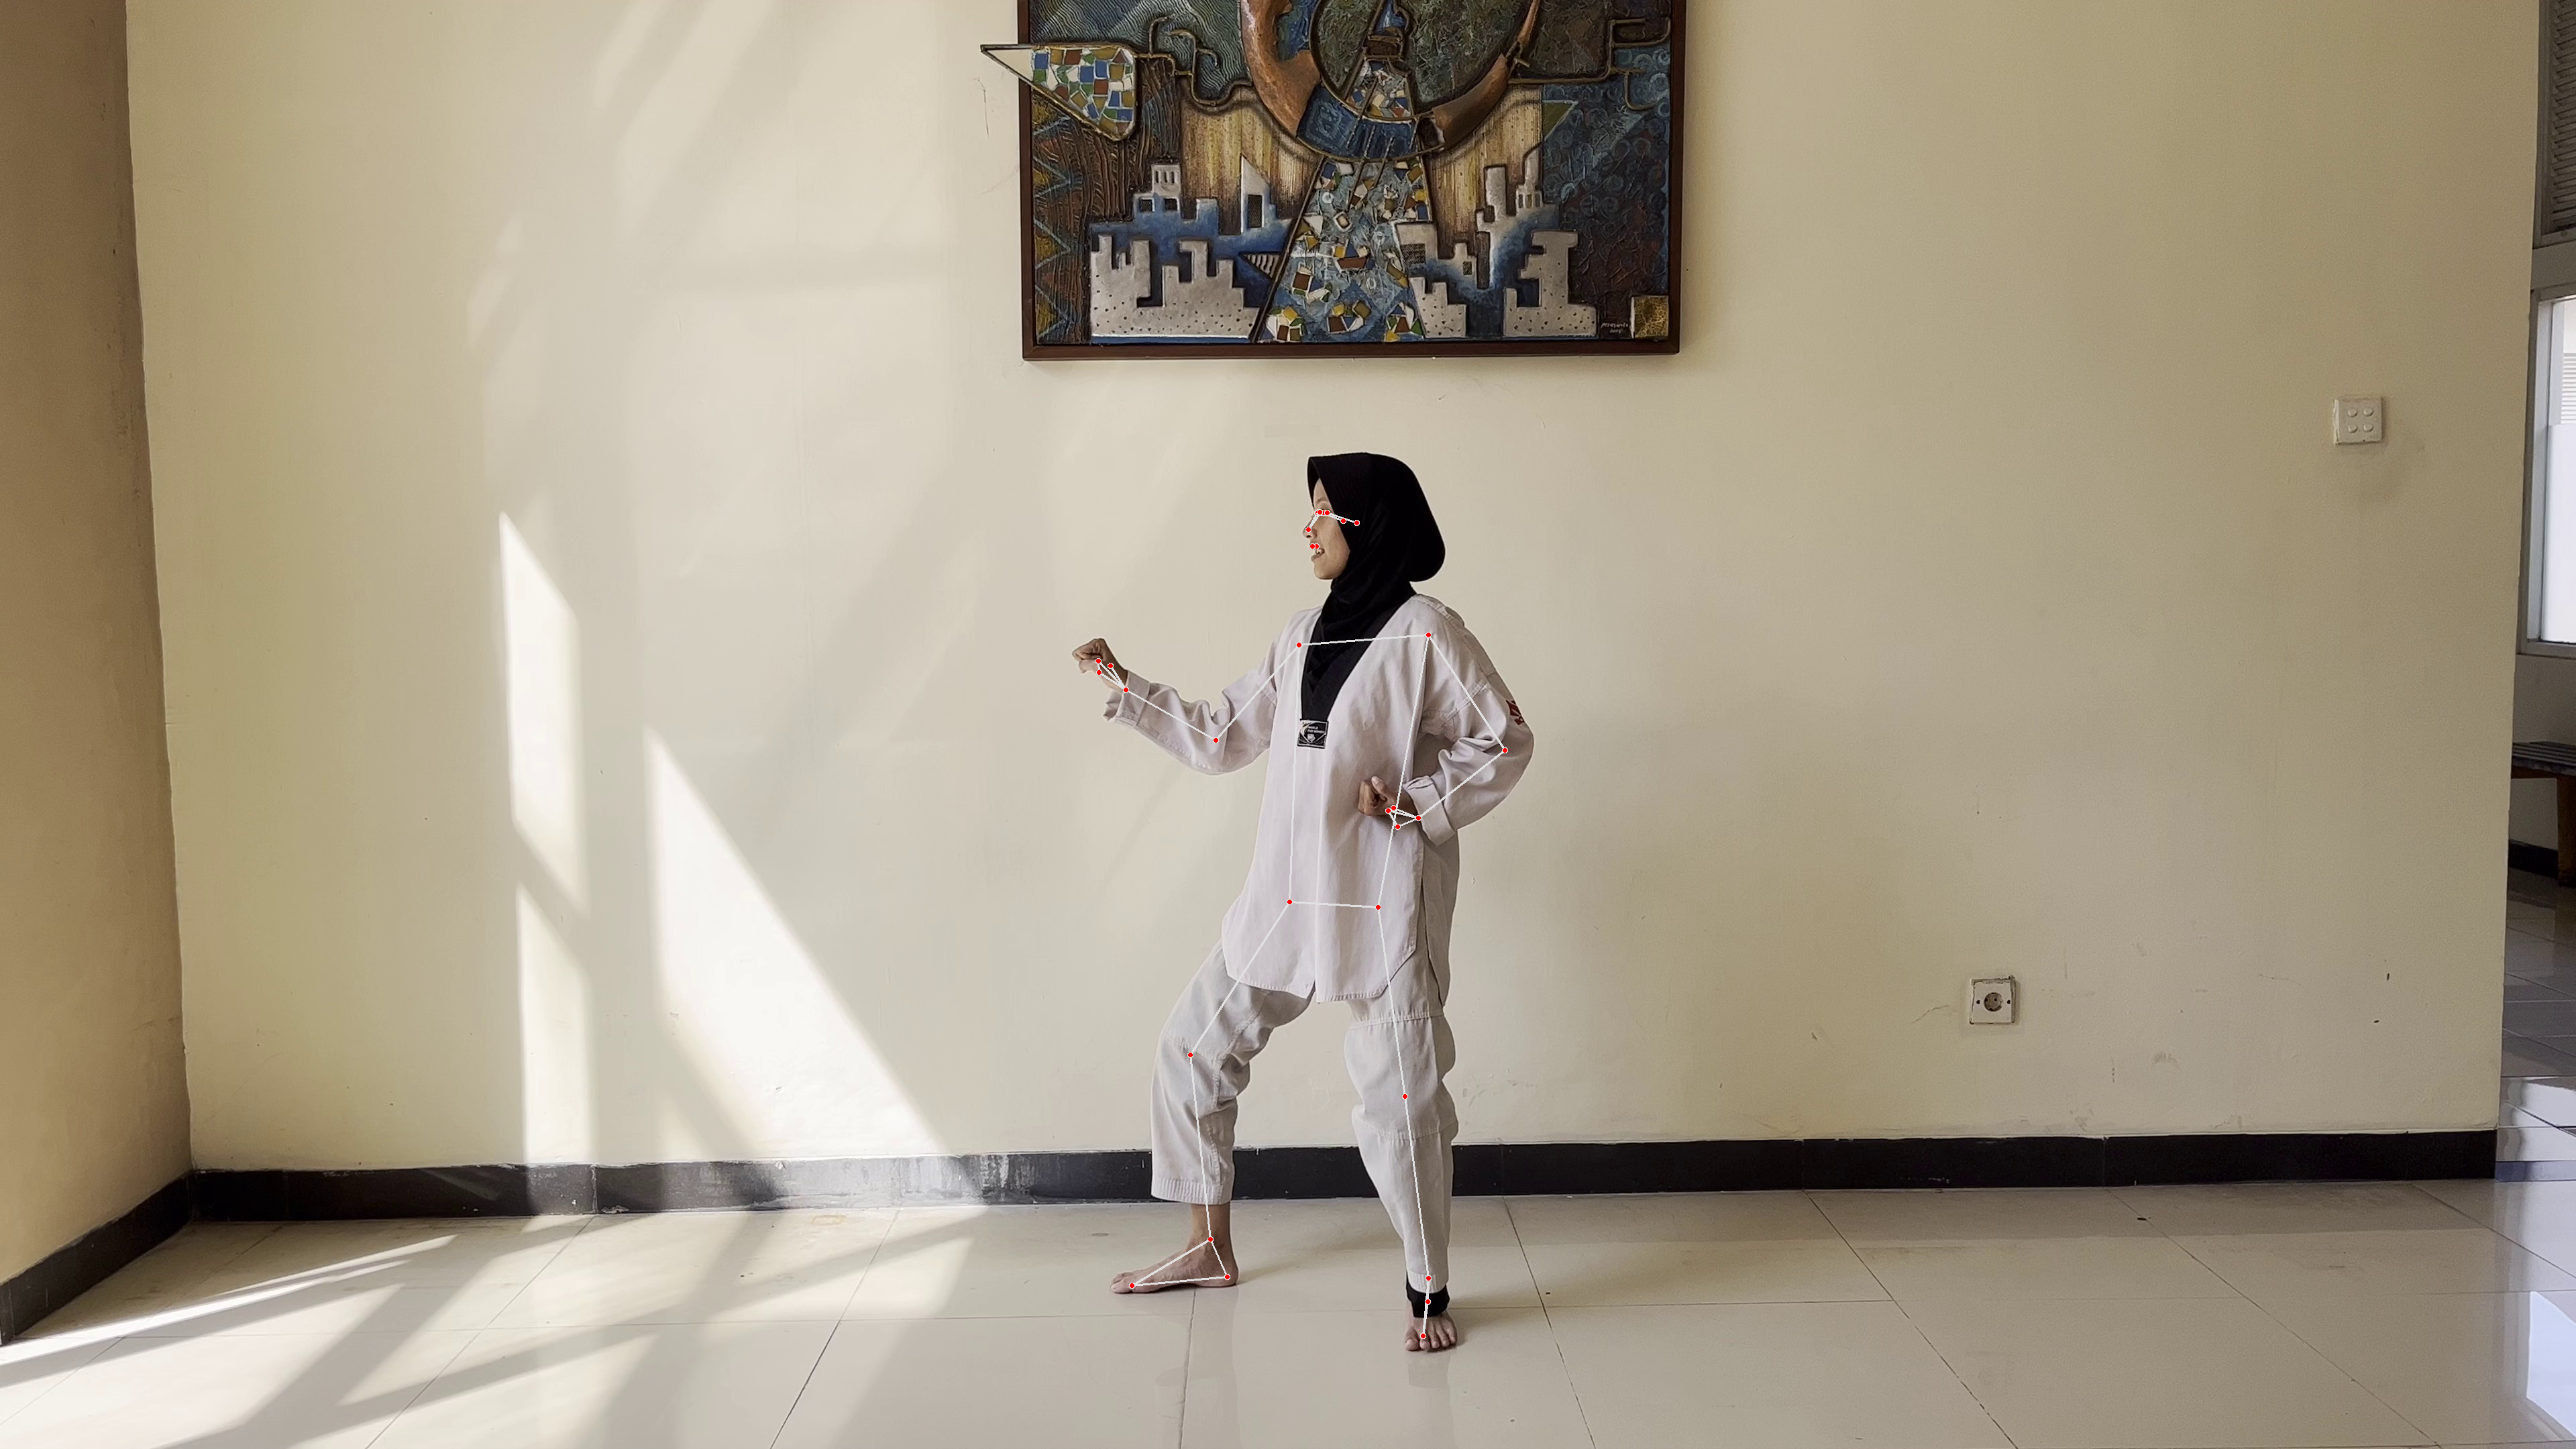

In [ ]:
from google.colab.patches import cv2_imshow

# Open the video file
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform pose detection
    results = pose.process(frame_rgb)

    # Draw pose landmarks on the frame
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display the frame with the landmarks
    cv2_imshow(frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import mediapipe as mp
import os

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Load the video file
# video_path = 'your_video_path_here.mp4'
root_path = '/content/drive/MyDrive/dataset video/'
for move_names in os.listdir(root_path):
  for move_details in os.listdir(root_path+move_names):
    for vid_names in os.listdir(root_path+move_names+'/'+move_details):
      if vid_names.endswith('.mp4'):
        video_path = root_path+move_names+'/'+move_details+'/'+vid_names
        print("processing: "+video_path.split('.mp4')[0])
        os.mkdir(video_path.split('.mp4')[0])
        # Open the video file
        cap = cv2.VideoCapture(video_path)
        frame_no = 0
        # Set up Pose estimation

        with mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                # Convert the frame to RGB
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Perform pose detection
                results = pose.process(frame_rgb)

                # Create a black image with the same dimensions as the frame
                skeleton_image = np.zeros_like(frame)

                # Draw pose landmarks on the black image
                if results.pose_landmarks:
                    mp_drawing.draw_landmarks(
                        skeleton_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                # Display the skeleton image
                # cv2_imshow(skeleton_image)
                cv2.imwrite(video_path.split('.mp4')[0]+"/"+str(frame_no)+".jpg", skeleton_image)
                frame_no += 1

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

        # Release the video capture object
        cap.release()

processing: /content/drive/MyDrive/dataset video/tangkisan/anmaki/ica-anmaki (1)


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


processing: /content/drive/MyDrive/dataset video/tangkisan/anmaki/ica-anmaki (2)
processing: /content/drive/MyDrive/dataset video/tangkisan/arae maki/ica-arae maki (3)
processing: /content/drive/MyDrive/dataset video/tangkisan/arae maki/ica-arae maki (2)
processing: /content/drive/MyDrive/dataset video/tangkisan/arae maki/ica-arae maki (1)
processing: /content/drive/MyDrive/dataset video/tangkisan/arae maki/sheila-arae maki
processing: /content/drive/MyDrive/dataset video/tangkisan/batangson/ica-batangson
processing: /content/drive/MyDrive/dataset video/tangkisan/eolgol maki/ica-eolgol maki
processing: /content/drive/MyDrive/dataset video/tangkisan/jibibom/ica-jibibom
processing: /content/drive/MyDrive/dataset video/tangkisan/khansonal momtong maki/ica-khansonal momtong maki
processing: /content/drive/MyDrive/dataset video/tangkisan/momtong jirugi/ica-momtong jirugi (2)
processing: /content/drive/MyDrive/dataset video/tangkisan/momtong jirugi/ica-momtong jirugi (1)
processing: /content

Extract Joint Coordinates

In [ ]:
# Reopen the video file
cap = cv2.VideoCapture(video_path)

joint_coordinates = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform pose detection
    results = pose.process(frame_rgb)

    # Extract coordinates of specific joints
    if results.pose_landmarks:
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w, c = frame.shape
            cx, cy = int(lm.x * w), int(lm.y * h)
            joint_coordinates.append((id, cx, cy))

cap.release()

# Display the joint coordinates
for joint in joint_coordinates:
    print(f"Joint ID: {joint[0]}, X: {joint[1]}, Y: {joint[2]}")


Joint ID: 0, X: 1940, Y: 791
Joint ID: 1, X: 1958, Y: 766
Joint ID: 2, X: 1963, Y: 766
Joint ID: 3, X: 1967, Y: 767
Joint ID: 4, X: 1956, Y: 765
Joint ID: 5, X: 1958, Y: 765
Joint ID: 6, X: 1961, Y: 764
Joint ID: 7, X: 2005, Y: 782
Joint ID: 8, X: 1993, Y: 777
Joint ID: 9, X: 1950, Y: 817
Joint ID: 10, X: 1945, Y: 817
Joint ID: 11, X: 2125, Y: 942
Joint ID: 12, X: 1938, Y: 954
Joint ID: 13, X: 2257, Y: 1115
Joint ID: 14, X: 1803, Y: 1097
Joint ID: 15, X: 2126, Y: 1206
Joint ID: 16, X: 1664, Y: 1045
Joint ID: 17, X: 2083, Y: 1222
Joint ID: 18, X: 1627, Y: 1024
Joint ID: 19, X: 2070, Y: 1199
Joint ID: 20, X: 1621, Y: 1011
Joint ID: 21, X: 2083, Y: 1193
Joint ID: 22, X: 1635, Y: 1016
Joint ID: 23, X: 2053, Y: 1361
Joint ID: 24, X: 1920, Y: 1350
Joint ID: 25, X: 2086, Y: 1644
Joint ID: 26, X: 1780, Y: 1561
Joint ID: 27, X: 2131, Y: 1909
Joint ID: 28, X: 1800, Y: 1848
Joint ID: 29, X: 2133, Y: 1941
Joint ID: 30, X: 1824, Y: 1894
Joint ID: 31, X: 2126, Y: 1990
Joint ID: 32, X: 1683, Y: 1909


In [ ]:
from google.colab.patches import cv2_imshow

# prompt: create skeleton feature and save it as image from mediapipe joint coordinates

import numpy as np

# Define the connections between joints for drawing the skeleton
skeleton_connections2 = [
    (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
    (11, 12), (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20),
    (11, 23), (12, 24), (23, 24), (23, 25), (24, 26), (25, 27), (26, 28),
    (27, 29), (28, 30), (29, 31), (30, 32), (27, 31), (28, 32)
]
skeleton_connections = []
count = 0
for joint in joint_coordinates:
    # print((joint[1], joint[2]))
    skeleton_connections.append((joint[1], joint[2]))
    count += 1
    if count == 26:
        break
# print(skeleton_connections)
# print(skeleton_connections2)


# Reopen the video file
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform pose detection
    results = pose.process(frame_rgb)

    # Draw skeleton on a blank image
    skeleton_image = np.zeros_like(frame)
    if results.pose_landmarks:
        for connection in skeleton_connections:
            start_joint = results.pose_landmarks.landmark[connection[0]]
            end_joint = results.pose_landmarks.landmark[connection[1]]
            start_coord = (int(start_joint.x * frame.shape[1]), int(start_joint.y * frame.shape[0]))
            end_coord = (int(end_joint.x * frame.shape[1]), int(end_joint.y * frame.shape[0]))
            cv2.line(skeleton_image, start_coord, end_coord, (255, 255, 255), 2)

    # Display the skeleton image
    cv2_imshow(skeleton_image)

    # Save the skeleton image
    cv2.imwrite("skeleton_frame.jpg", skeleton_image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


IndexError: list index out of range